In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Segregating the Fraud and Normal transactions from the dataset


In [4]:
fraud = data.loc[data['Class'] == 1]
normal = data.loc[data['Class'] == 0]

In [5]:
fraud['Class'].value_counts()

1    492
Name: Class, dtype: int64

In [6]:
normal['Class'].value_counts()

0    284315
Name: Class, dtype: int64

## EDA

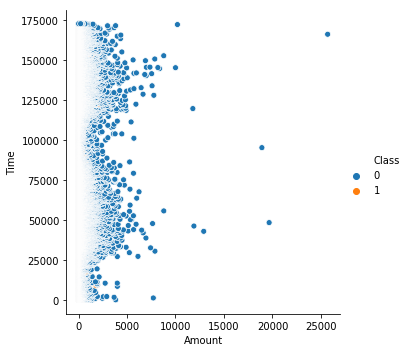

In [7]:
sns.relplot(x = 'Amount', y = 'Time', hue = 'Class' , data=data)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
x = data.iloc[:,:-1]
y = data['Class']

In [12]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35)

In [17]:
lr = LogisticRegression(C=1e5)

In [18]:
lr.fit(x_train, y_train)

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = np.array(lr.predict(x_test))
y = np.array(y_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score

In [23]:
print(confusion_matrix(y_test, y_pred))

[[99483    25]
 [   75   100]]


In [24]:
print(accuracy_score(y_test, y_pred))

0.9989968199191437


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99508
           1       0.80      0.57      0.67       175

    accuracy                           1.00     99683
   macro avg       0.90      0.79      0.83     99683
weighted avg       1.00      1.00      1.00     99683

